<a name='imports'>

# 2 <span style='color:blue'>|</span> Importing & Setup

In [1]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

C:\Users\jms\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jms\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jms\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Global variables
SAVE = False
SEED = 111

# Setting seed for consistent results
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Data Visualization updates
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams.update({'font.size': 14})

# Data Classifications
CLASS_TYPES = ['pituitary', 'notumor', 'meningioma', 'glioma']
N_TYPES = len(CLASS_TYPES)


***
<a name='import_data'>
    
# 3 <span style='color:blue'>|</span> Importing Data

In [3]:
# Function for inporting data           
def get_data_labels(directory, shuffle=True, random_state=0):
    """
    Function used for going into the main training directory
    whose directory has sub-class-types.
    """
    from sklearn.utils import shuffle
    import os

    # Lists to store data and labels
    data_path = []
    data_labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        # Avoid MacOS storing path
        if not os.path.isdir(label_dir):
            continue

        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)
            
    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)
            
    return data_path, data_labels


In [4]:

# Setting up file paths for training and testing
USER_PATH =  r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2/'
train_dir =  r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Training/'
test_dir =   r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/'
# Getting data using above function
train_paths, train_labels = get_data_labels(train_dir)
test_paths, test_labels = get_data_labels(test_dir)

# Printing traing and testing sample sizes
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

Training
Number of Paths: 5712
Number of Labels: 5712

Testing
Number of Paths: 1311
Number of Labels: 1311


***

<a name='vis'>
    
# 4 <span style='color:blue'>|</span> Data Visualization
    
## <b> 4.2 <span style='border-left: 4px solid #0000FF; padding-left: 10px;'>  Data Distributions <b>

Training Counts
{'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}

Testing Counts
{'pituitary': 300, 'notumor': 405, 'meningioma': 306, 'glioma': 300}


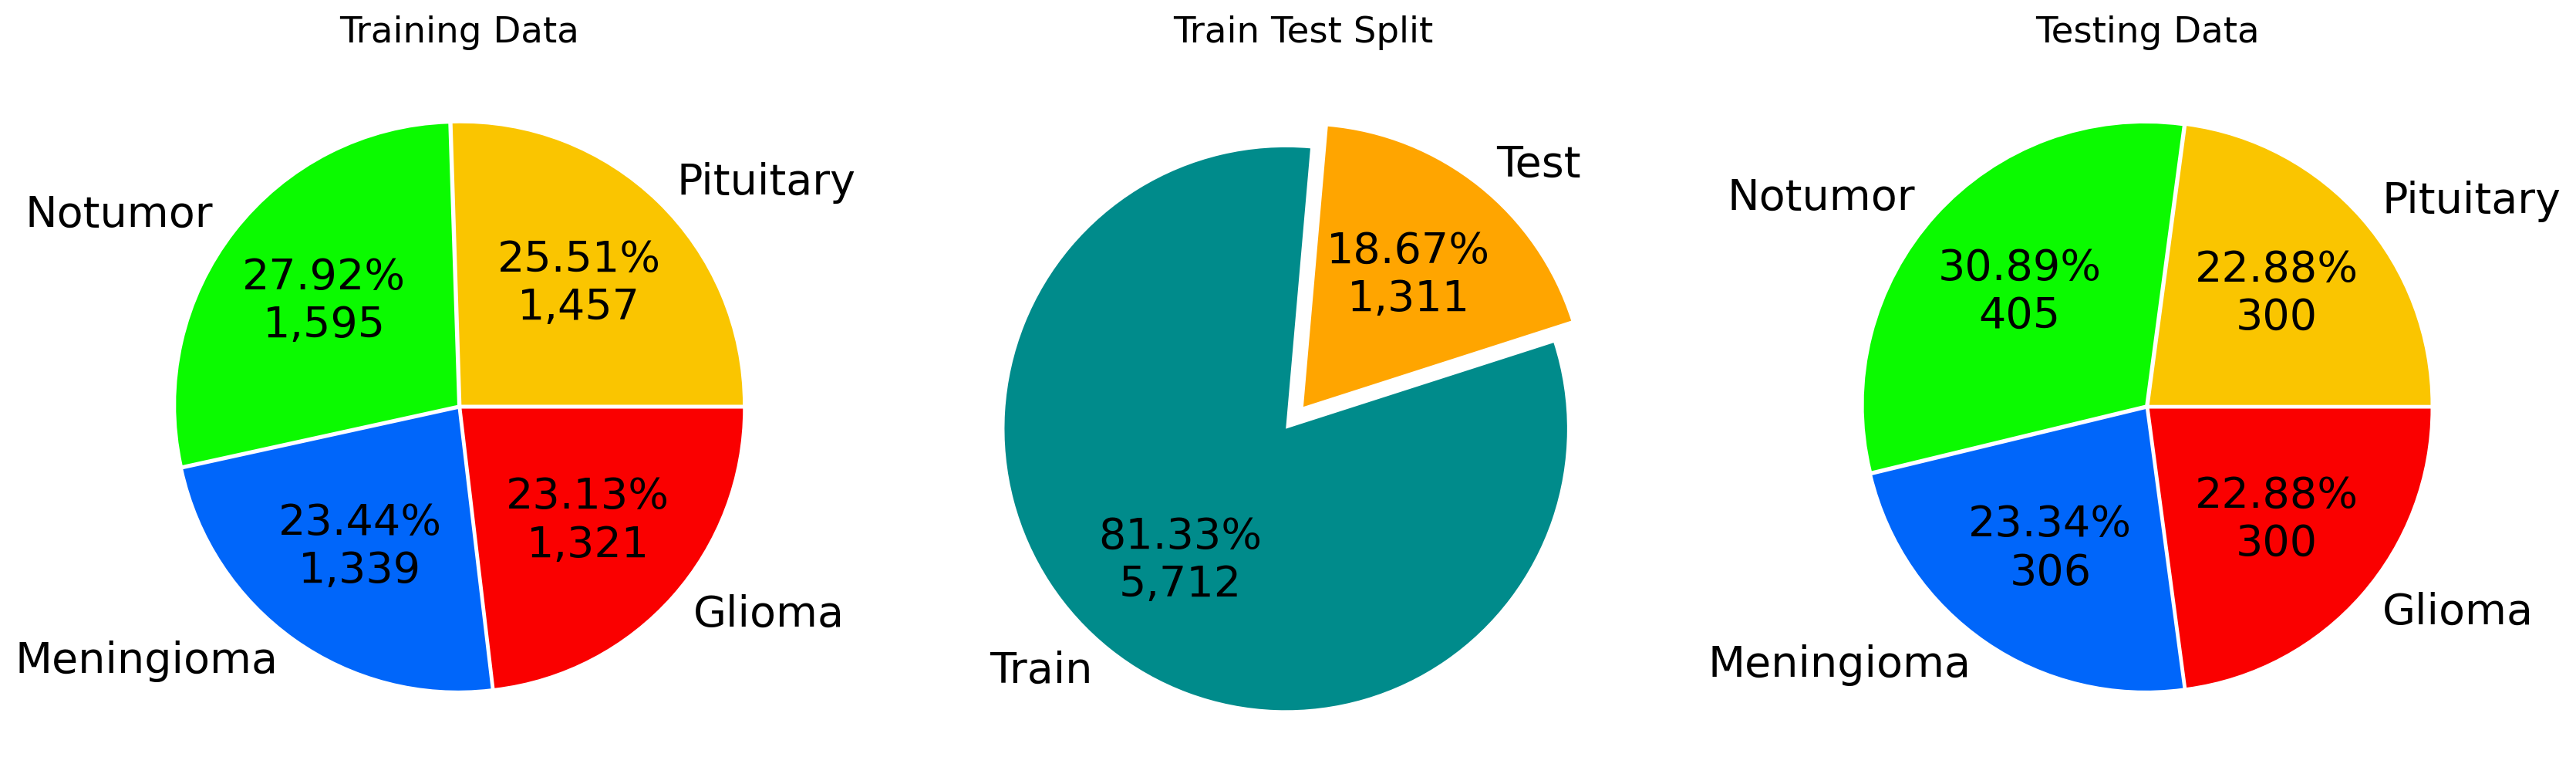

In [5]:
_, ax = plt.subplots(ncols=3, figsize=(20, 14))

# Plotting training data types
class_counts = [len([x for x in train_labels if x == label]) for label in CLASS_TYPES]
print('Training Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[0].set_title('Training Data')
ax[0].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),
    textprops={'fontsize': 20}
)

# Plotting distribution of train test split
ax[1].set_title('Train Test Split')
ax[1].pie(
    [len(train_labels), len(test_labels)],
    labels=['Train','Test'],
    colors=['darkcyan', 'orange'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(train_labels), len(test_labels)]) / 100),
    explode=(0.1, 0),
    startangle=85,
    textprops={'fontsize': 20}
)

# Plotting testing data types
class_counts = [len([x for x in test_labels if x == label]) for label in CLASS_TYPES]
print('\nTesting Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[2].set_title('Testing Data')
ax[2].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),  # Explode the slices slightly for better visualization
    textprops={'fontsize': 20}  # Set the font size for the text on the pie chart
)


plt.show()

A balanced distribution of categories in our training data is crucial for optimal model learning. It allows for comprehensive understanding of each category's characteristics, prevents biases, enhances generalization, and enables iterative refinement, leading to improved performance in accurately categorizing new data.

We also have a nice split percentage in our training and testing set.

x reshaped: (1, 150, 150, 3)


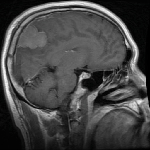

In [6]:
# getting image to test output
im = load_img(train_paths[3], target_size=(150, 150))
im = img_to_array(im)

# Reshape it to (1, 150, 150, 3)
im = np.expand_dims(im, axis=0)
print(f'x reshaped: {im.shape}')

# normilzation tensor
im /= np.max(im) # ~ np.max(img_tensor)

# Convert the array back to the image format
im = array_to_img(im[0])
display(im)

***
<a name='DP'>
    
# 5 <span style='color:blue'>|</span> Data Processing & Training Setup Values 

In [7]:
# Image size
image_size = (150,150)

# Training batch size
batch_size = 32

In [8]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")


# applying the generator to training data with constant seed
train_generator =tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                    image_size=image_size,
                                                    batch_size=batch_size,
                                                    label_mode="categorical",
                                                    
                                                    seed=SEED)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                  image_size=image_size,
                                                  batch_size=batch_size,
                                                  label_mode="categorical",
                                                  shuffle=False,
                                                  seed=SEED)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


### <b> 5.1.1 <span style='border-left: 4px solid #0000FF; padding-left: 10px;'> Data Augmentation Class Indices <b>

In [9]:
# Accessing class indices for training data generator
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())


# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

AttributeError: '_PrefetchDataset' object has no attribute 'class_indices'

### <b> 5.1.2 <span style='border-left: 4px solid #0000FF; padding-left: 10px;'>  Showing Data Augmentation <b>

In [ ]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """
    
    # Generate augmented samples
    augmented_samples = train_generator.next()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
        
    plt.tight_layout()
        
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
        
    plt.show()


In [ ]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=SAVE)

## <b> 5.2 <span style='border-left: 4px solid #0000FF; padding-left: 10px;'> Training Setup Values <b>

In [10]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 40

# Steps per epoch
steps_per_epoch = train_generator.samples // batch_size

# Validation steps
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

AttributeError: '_PrefetchDataset' object has no attribute 'samples'

In [11]:
#Defining CallBack list
from tensorflow.keras import callbacks
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [12]:
#--Define Base_Model (EfficientNetB0)

base_model = tf.keras.applications.EfficientNetB0(include_top = False) #excluding the top layer 

base_model.trainable = False #--> Freezing the model parameters (Make it's parameter not learnable)

inputs = tf.keras.layers.Input(shape = (150 , 150 , 3) , name = "Input_layer") #--> Define the input layer

x = base_model(inputs)  

x = Conv2D(32 , 3 , padding = 'same' , activation = "relu" , name = "Top_Conv_Layer")(x) #--> add a Conv2D layer which we will use in the segmentation as the Top conv Layer

x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_avg_Pooling_2D")(x) #--> Add Global Average Pooling Layer 2D

outputs = tf.keras.layers.Dense(4 , #--> Because we have 4 Classes
                                activation = "softmax" , #we will change it to linear when we apply sigmentation
                                name = "Output_layer")(x) 
Model_1 = tf.keras.Model(inputs , outputs) #--> Defining the model 



In [13]:
#Compile the model 

Model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy ,#--> Multiclass classification
    optimizer = tf.keras.optimizers.Adam() , #--> Adam optimizer with Learning_rate = 0.001
    metrics = ['accuracy'] 
)


#Fitting the model for 5 epochs 

Model_1_History = Model_1.fit(train_generator 
                              , validation_data = test_generator ,
                              epochs = 5  ,
                              verbose = 1 ,
                              callbacks = callback_list)

Epoch 1/5
179/179 [==============================] - 357s 2s/step - loss: 0.4159 - accuracy: 0.8440 - val_loss: 0.2929 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - 336s 2s/step - loss: 0.2095 - accuracy: 0.9214 - val_loss: 0.2167 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - 334s 2s/step - loss: 0.1535 - accuracy: 0.9412 - val_loss: 0.1540 - val_accuracy: 0.9321 - lr: 0.0010
Epoch 4/5
179/179 [==============================] - 330s 2s/step - loss: 0.1055 - accuracy: 0.9615 - val_loss: 0.1548 - val_accuracy: 0.9336 - lr: 0.0010
Epoch 5/5
179/179 [==============================] - 326s 2s/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.1410 - val_accuracy: 0.9497 - lr: 0.0010


In [15]:
#Define the function to plot loss and accuracy curves of train - valid 
def plot_loss_curves(history):
    train_loss = history.history["loss"]
    val_loss = history.history['val_loss']
    train_accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    #Plot Loss
    plt.plot(epochs , train_loss , label = "Train Loss")
    plt.plot(epochs , val_loss , label = "Val Loss" )
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    #Plot accuracy
    plt.figure()
    plt.plot(epochs ,train_accuracy , label = "train_accuracy")
    plt.plot(epochs , val_accuracy , label = "val_accuracy" )
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

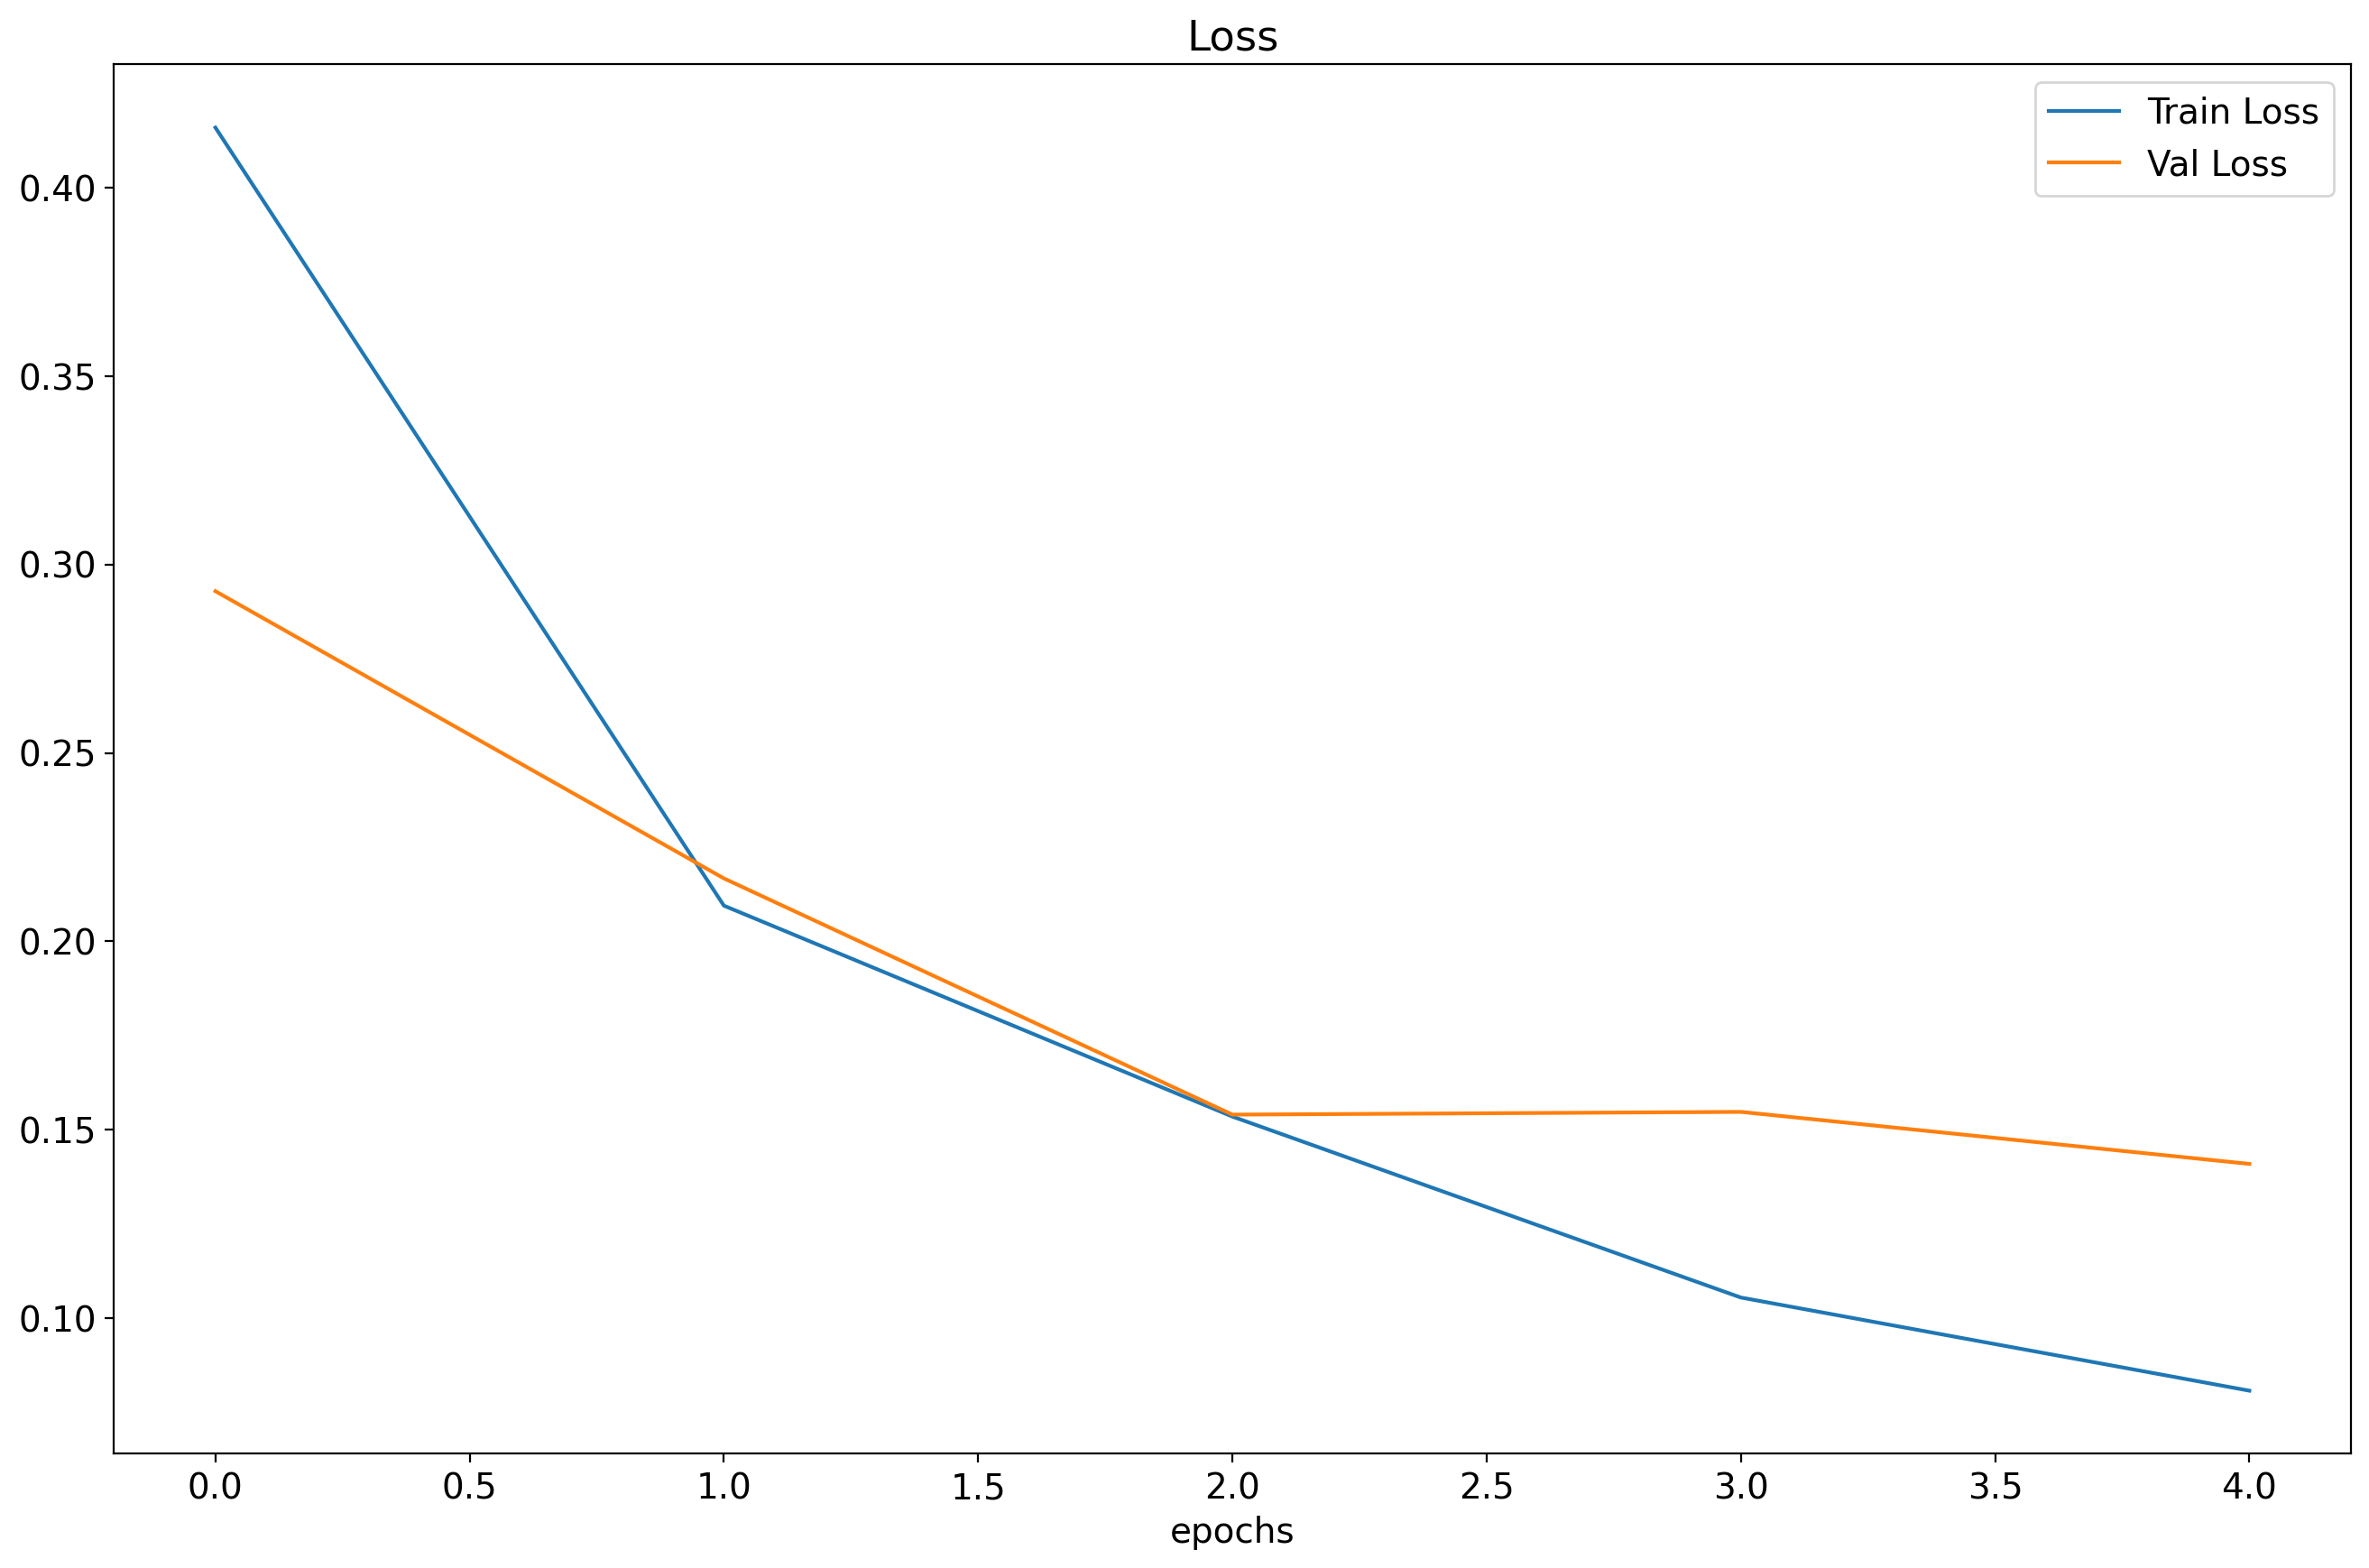

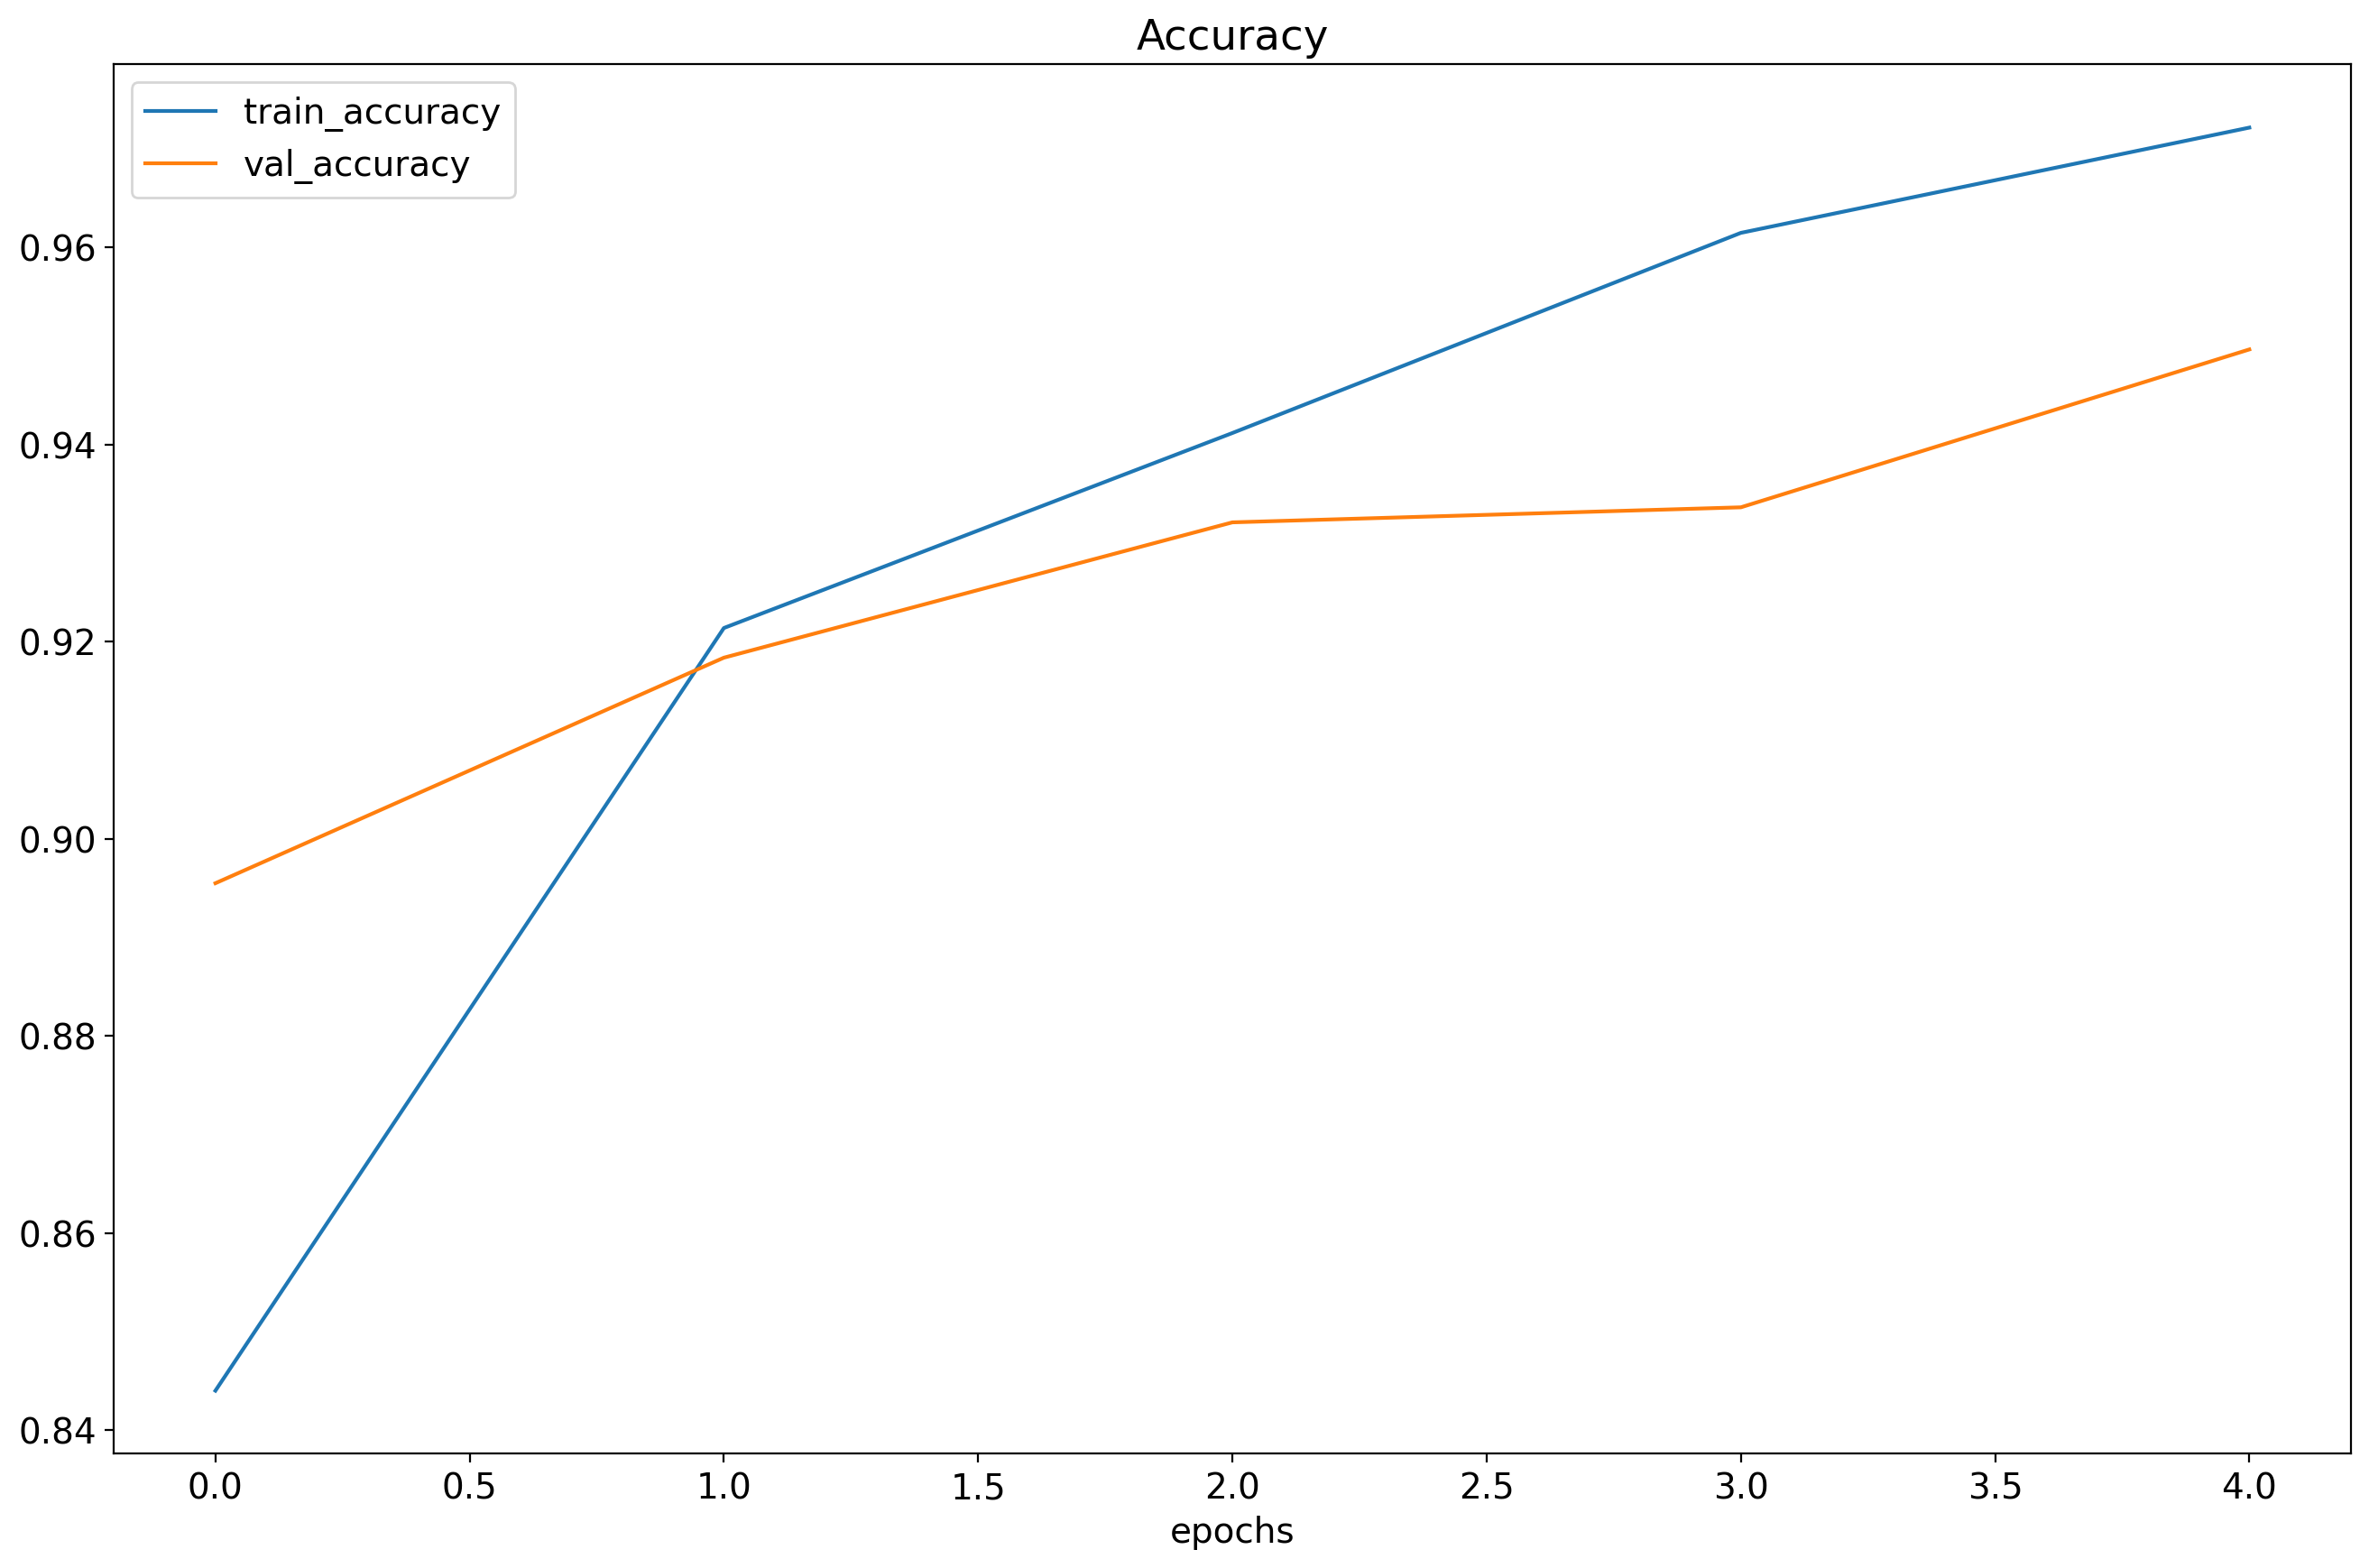

In [16]:
plot_loss_curves(Model_1_History)

## <b> 8.1 <span style='border-left: 4px solid #0000FF; padding-left: 10px;'>  Training Model <b>

In [17]:
# Un freaze all the Base_model 
base_model.trainable = True

#Freezing all the layers except last 10 
for layer in base_model.layers[:-10]:
    layer.trainable = False


#ReCompile the model 
Model_1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ["accuracy"]
               )


#FineTune for 10 epochs 
initial_epoch = 5

Fine_Tune_epoch = initial_epoch + 5

#Refit the model 
Stage_2_history = Model_1.fit(train_generator ,
                              epochs = Fine_Tune_epoch , 
                              validation_data =  test_generator ,
                              validation_steps = len( test_generator) ,
                              initial_epoch = initial_epoch-1)

Epoch 5/10
179/179 [==============================] - 465s 2s/step - loss: 0.1358 - accuracy: 0.9596 - val_loss: 0.1212 - val_accuracy: 0.9519
Epoch 6/10
179/179 [==============================] - 384s 2s/step - loss: 0.0646 - accuracy: 0.9783 - val_loss: 0.0979 - val_accuracy: 0.9664
Epoch 7/10
179/179 [==============================] - 408s 2s/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.1022 - val_accuracy: 0.9687
Epoch 8/10
179/179 [==============================] - 385s 2s/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0906 - val_accuracy: 0.9649
Epoch 9/10
179/179 [==============================] - 386s 2s/step - loss: 0.0287 - accuracy: 0.9902 - val_loss: 0.0904 - val_accuracy: 0.9733
Epoch 10/10
179/179 [==============================] - 372s 2s/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.0978 - val_accuracy: 0.9634


In [18]:
#ReCompile the model and reduce Learning rate by 10x
Model_1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001), #--< lower the LR by 10x
                metrics = ["accuracy"]
               )
initial_epoch = 10
Fine_Tune_epoch = initial_epoch + 1
#Refit the model for 2 more epochs
Stage_2_history = Model_1.fit(train_generator ,
                              epochs = Fine_Tune_epoch , 
                              validation_data = test_generator ,
                              validation_steps = len(test_generator) ,
                              initial_epoch = initial_epoch-1)

Epoch 10/11
179/179 [==============================] - 404s 2s/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.0912 - val_accuracy: 0.9680
Epoch 11/11
179/179 [==============================] - 381s 2s/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 0.0864 - val_accuracy: 0.9710


In [89]:
#Define Some Functions :
import tensorflow.keras as keras
import matplotlib as mpl
import matplotlib.image as img
last_conv_layer_name = "Top_Conv_Layer"

def get_img_array(img_path, size = (150,150)):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array



def make_gradcam_heatmap(img_array, model = Model_1 , last_conv_layer_name = last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
           # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4 , view = False):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
 # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    if view :
        display(Image(cam_path))
def decode_predictions(preds):
    classes = ['Glioma' , 'meningioma' , 'No Tumor' , 'Pituitary']
    prediction = classes[np.argmax(preds)]
    return prediction



def make_prediction (img_path , model = Model_1 , last_conv_layer_name = last_conv_layer_name , campath = "cam.jpeg" , view = False):
    img = get_img_array(img_path = img_path)
    img_array = get_img_array(img_path, size=(150,150))
    preds = Model_1.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    save_and_display_gradcam(img_path, heatmap , cam_path=campath , view = view)
    return [campath , decode_predictions(preds)]     

In [ ]:
campath, prediction = make_prediction(r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Training\pituitary\Tr-pi_0012.jpg', campath="123.jpeg", view=False)
print(prediction)

test_img = img.imread(campath)
plt.imshow(test_img)
plt.title(prediction)
plt.axis("off")
plt.show()  # Display the plotted image


In [21]:
def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)

# function to create dice loss
def dice_loss(y_true, y_pred, smooth=100):
    return -dice_coef(y_true, y_pred, smooth)

# function to create iou coefficient
def iou_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

In [22]:
#--Define Base_Model (EfficientNetB0)

base_model = tf.keras.applications.EfficientNetB0(include_top = False) #excluding the top layer 

base_model.trainable = False #--> Freezing the model parameters (Make it's parameter not learnable)

inputs = tf.keras.layers.Input(shape = (150 , 150 , 3) , name = "Input_layer") #--> Define the input layer

x = base_model(inputs)  

x = Conv2D(32 , 3 , padding = 'same' , activation = "relu" , name = "Top_Conv_Layer")(x) #--> add a Conv2D layer which we will use in the segmentation as the Top conv Layer

x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_avg_Pooling_2D")(x) #--> Add Global Average Pooling Layer 2D

outputs = tf.keras.layers.Dense(4 , #--> Because we have 4 Classes
                                activation = "softmax" , #we will change it to linear when we apply sigmentation
                                name = "Output_layer")(x) 
Model_1 = tf.keras.Model(inputs , outputs) #--> Defining the model 



In [23]:
#Compile the model 
from tensorflow.keras import backend as K
Model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy ,#--> Multiclass classification
    optimizer = tf.keras.optimizers.Adam() , #--> Adam optimizer with Learning_rate = 0.001
    metrics = ['accuracy', iou_coef, dice_coef]
)


#Fitting the model for 5 epochs 

Model_1_History = Model_1.fit(train_generator 
                              , validation_data = test_generator ,
                              epochs = 5  ,
                              verbose = 1 ,
                              callbacks = callback_list)

Epoch 1/5
179/179 [==============================] - 363s 2s/step - loss: 0.3947 - accuracy: 0.8517 - iou_coef: 0.9022 - dice_coef: 0.9165 - val_loss: 0.2634 - val_accuracy: 0.9008 - val_iou_coef: 0.9298 - val_dice_coef: 0.9401 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - 337s 2s/step - loss: 0.2017 - accuracy: 0.9238 - iou_coef: 0.9440 - dice_coef: 0.9535 - val_loss: 0.1972 - val_accuracy: 0.9153 - val_iou_coef: 0.9490 - val_dice_coef: 0.9565 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - 347s 2s/step - loss: 0.1433 - accuracy: 0.9464 - iou_coef: 0.9584 - dice_coef: 0.9657 - val_loss: 0.1460 - val_accuracy: 0.9405 - val_iou_coef: 0.9597 - val_dice_coef: 0.9661 - lr: 0.0010
Epoch 4/5
179/179 [==============================] - 355s 2s/step - loss: 0.1027 - accuracy: 0.9641 - iou_coef: 0.9696 - dice_coef: 0.9751 - val_loss: 0.1446 - val_accuracy: 0.9466 - val_iou_coef: 0.9640 - val_dice_coef: 0.9697 - lr: 0.0010
Epoch 5/5
179/179 [=================

In [24]:
# Un freaze all the Base_model 
base_model.trainable = True

#Freezing all the layers except last 10 
for layer in base_model.layers[:-10]:
    layer.trainable = False


#ReCompile the model 
Model_1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ['accuracy', iou_coef, dice_coef]
               )


#FineTune for 10 epochs 
initial_epoch = 5

Fine_Tune_epoch = initial_epoch + 5

#Refit the model 
Stage_2_history = Model_1.fit(train_generator ,
                              epochs = Fine_Tune_epoch , 
                              validation_data =  test_generator ,
                              validation_steps = len( test_generator) ,
                              initial_epoch = initial_epoch-1)

Epoch 5/10
179/179 [==============================] - 417s 2s/step - loss: 0.1262 - accuracy: 0.9576 - iou_coef: 0.9708 - dice_coef: 0.9760 - val_loss: 0.1295 - val_accuracy: 0.9603 - val_iou_coef: 0.9714 - val_dice_coef: 0.9760
Epoch 6/10
179/179 [==============================] - 391s 2s/step - loss: 0.0644 - accuracy: 0.9795 - iou_coef: 0.9816 - dice_coef: 0.9850 - val_loss: 0.1091 - val_accuracy: 0.9596 - val_iou_coef: 0.9749 - val_dice_coef: 0.9791
Epoch 7/10
179/179 [==============================] - 390s 2s/step - loss: 0.0483 - accuracy: 0.9827 - iou_coef: 0.9851 - dice_coef: 0.9879 - val_loss: 0.1042 - val_accuracy: 0.9687 - val_iou_coef: 0.9790 - val_dice_coef: 0.9824
Epoch 8/10
179/179 [==============================] - 415s 2s/step - loss: 0.0356 - accuracy: 0.9888 - iou_coef: 0.9884 - dice_coef: 0.9905 - val_loss: 0.1046 - val_accuracy: 0.9672 - val_iou_coef: 0.9794 - val_dice_coef: 0.9827
Epoch 9/10
179/179 [==============================] - 387s 2s/step - loss: 0.0289 - 

In [25]:
#ReCompile the model and reduce Learning rate by 10x
Model_1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001), #--< lower the LR by 10x
                 metrics = ['accuracy', iou_coef, dice_coef]
               )
initial_epoch = 10
Fine_Tune_epoch = initial_epoch + 1
#Refit the model for 2 more epochs
Stage_2_history = Model_1.fit(train_generator ,
                              epochs = Fine_Tune_epoch , 
                              validation_data = test_generator ,
                              validation_steps = len(test_generator) ,
                              initial_epoch = initial_epoch-1)

Epoch 10/11
179/179 [==============================] - 424s 2s/step - loss: 0.0189 - accuracy: 0.9958 - iou_coef: 0.9936 - dice_coef: 0.9948 - val_loss: 0.0867 - val_accuracy: 0.9664 - val_iou_coef: 0.9817 - val_dice_coef: 0.9847
Epoch 11/11
179/179 [==============================] - 402s 2s/step - loss: 0.0183 - accuracy: 0.9960 - iou_coef: 0.9934 - dice_coef: 0.9947 - val_loss: 0.0855 - val_accuracy: 0.9695 - val_iou_coef: 0.9821 - val_dice_coef: 0.9851


In [26]:
# Evaluate the model with test_generator
evaluation = Model_1.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])
print("Test IoU:", evaluation[2])
print("Test Dice:", evaluation[3])

41/41 [==============================] - 66s 2s/step - loss: 0.0855 - accuracy: 0.9695 - iou_coef: 0.9821 - dice_coef: 0.9851
Test Loss: 0.08551887422800064
Test Accuracy: 0.9694889187812805
Test IoU: 0.9821306467056274
Test Dice: 0.9850958585739136


1/1 [==============================] - 0s 220ms/step
meningioma


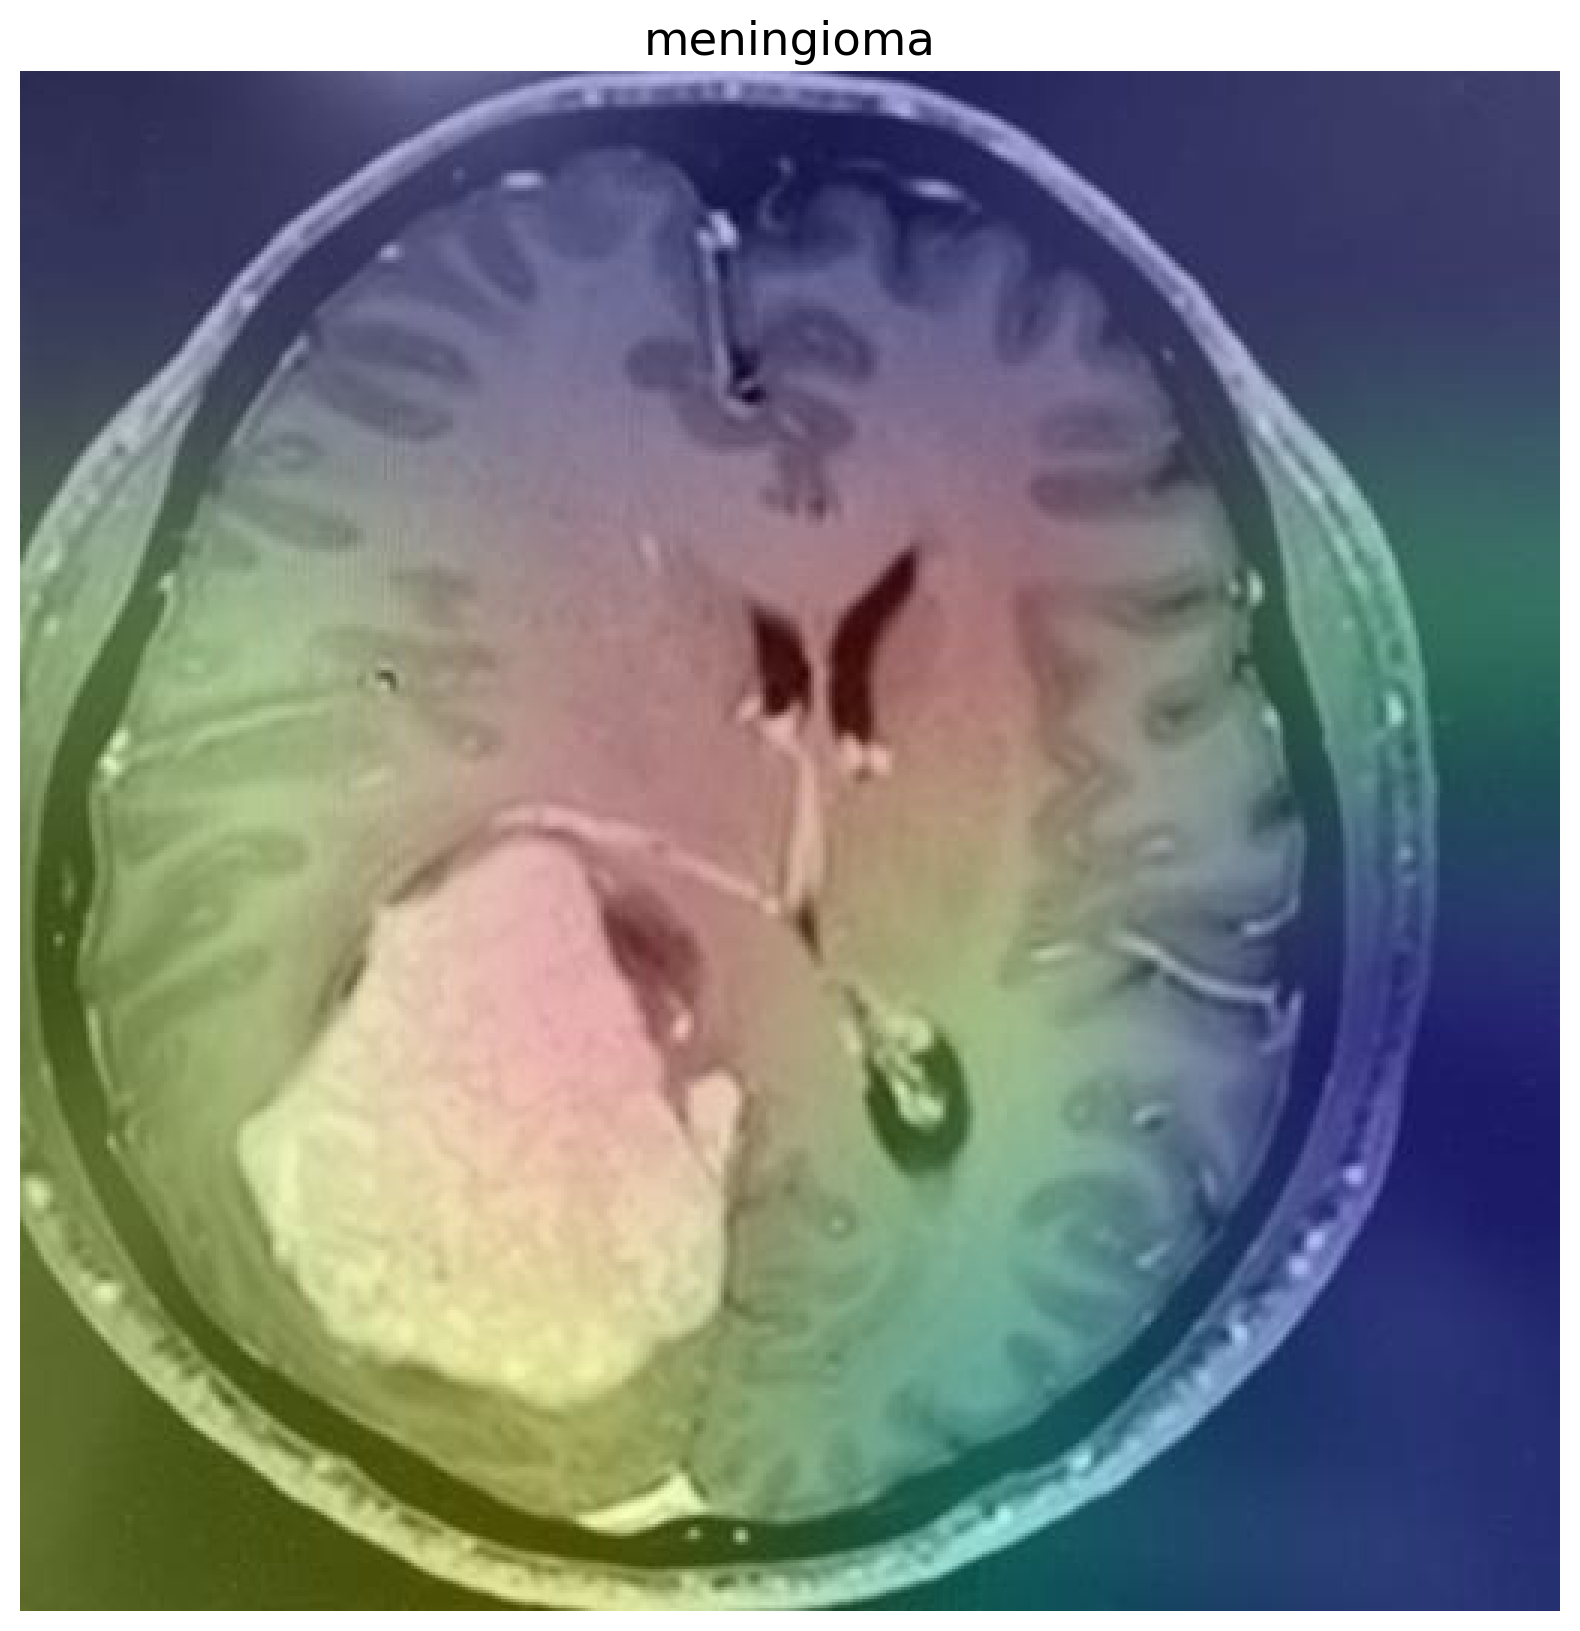

In [103]:
campath, prediction = make_prediction(r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/meningioma/Te-me_0090.jpg', campath="123.jpeg", view=False)
print(prediction)
#"C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata1\Testing\meningioma\Te-me_0015.jpg"
test_img = img.imread(campath)
fig = plt.figure(figsize=(10, 10))
plt.imshow(test_img)
plt.title(prediction)
plt.axis("off")
plt.show()  # Display the plotted image


In [ ]:
import matplotlib.pyplot as plt

# Define photos paths
path_array = [
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/meningioma/Te-me_0010.jpg',
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/meningioma/Te-me_0015.jpg',
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/meningioma/Te-me_0025.jpg',
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/pituitary/Te-pi_0010.jpg',
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/pituitary/Te-pi_0021.jpg',
    r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/pituitary/Te-pi_0030.jpg',
]

# Show predictions on 6 photos
fig = plt.figure(figsize=(7, 7))
fig.suptitle("Testing The model Segmentation on 6 photos", fontsize=20)

for i in range(6):
    ax = plt.subplot(3, 2, i + 1)
    campath, prediction = make_prediction(path_array[i], campath=f"{i}.jpeg")
    test_img = img.imread(campath)
    plt.imshow(test_img)
    plt.title("Prediction: " + prediction)
    plt.axis("off")


In [ ]:
ig = plt.figure(figsize=(7, 7))
fig.suptitle("Testing The model Segmentation on 6 photos", fontsize=20)

for i in range(6):
    ax = plt.subplot(3, 2, i + 1)
    campath, prediction = make_prediction(path_array[i], campath=f"{i}.jpeg")
    test_img = img.imread(campath)
    plt.imshow(test_img)
    plt.title("Prediction: " + prediction)
    plt.axis("off")

In [166]:
#Define Some Functions :
import tensorflow.keras as keras
import matplotlib as mpl
import matplotlib.image as img
last_conv_layer_name = "Top_Conv_Layer"

def get_img_array(img_path, size = (150,150)):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array



def make_gradcam_heatmap(img_array, model = Model_1 , last_conv_layer_name = last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
           # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.5 , view = False):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
 # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    if view :
        display(Image(cam_path))
def decode_predictions(preds):
    classes = ['Glioma' , 'meningioma' , 'No Tumor' , 'Pituitary']
    prediction = classes[np.argmax(preds)]
    return prediction



def make_prediction (img_path , model = Model_1 , last_conv_layer_name = last_conv_layer_name , campath = "cam.jpeg" , view = False):
    img = get_img_array(img_path = img_path)
    img_array = get_img_array(img_path, size=(150,150))
    preds = Model_1.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    save_and_display_gradcam(img_path, heatmap , cam_path=campath , view = view)
    return [campath , decode_predictions(preds)]     

1/1 [==============================] - 0s 140ms/step
meningioma


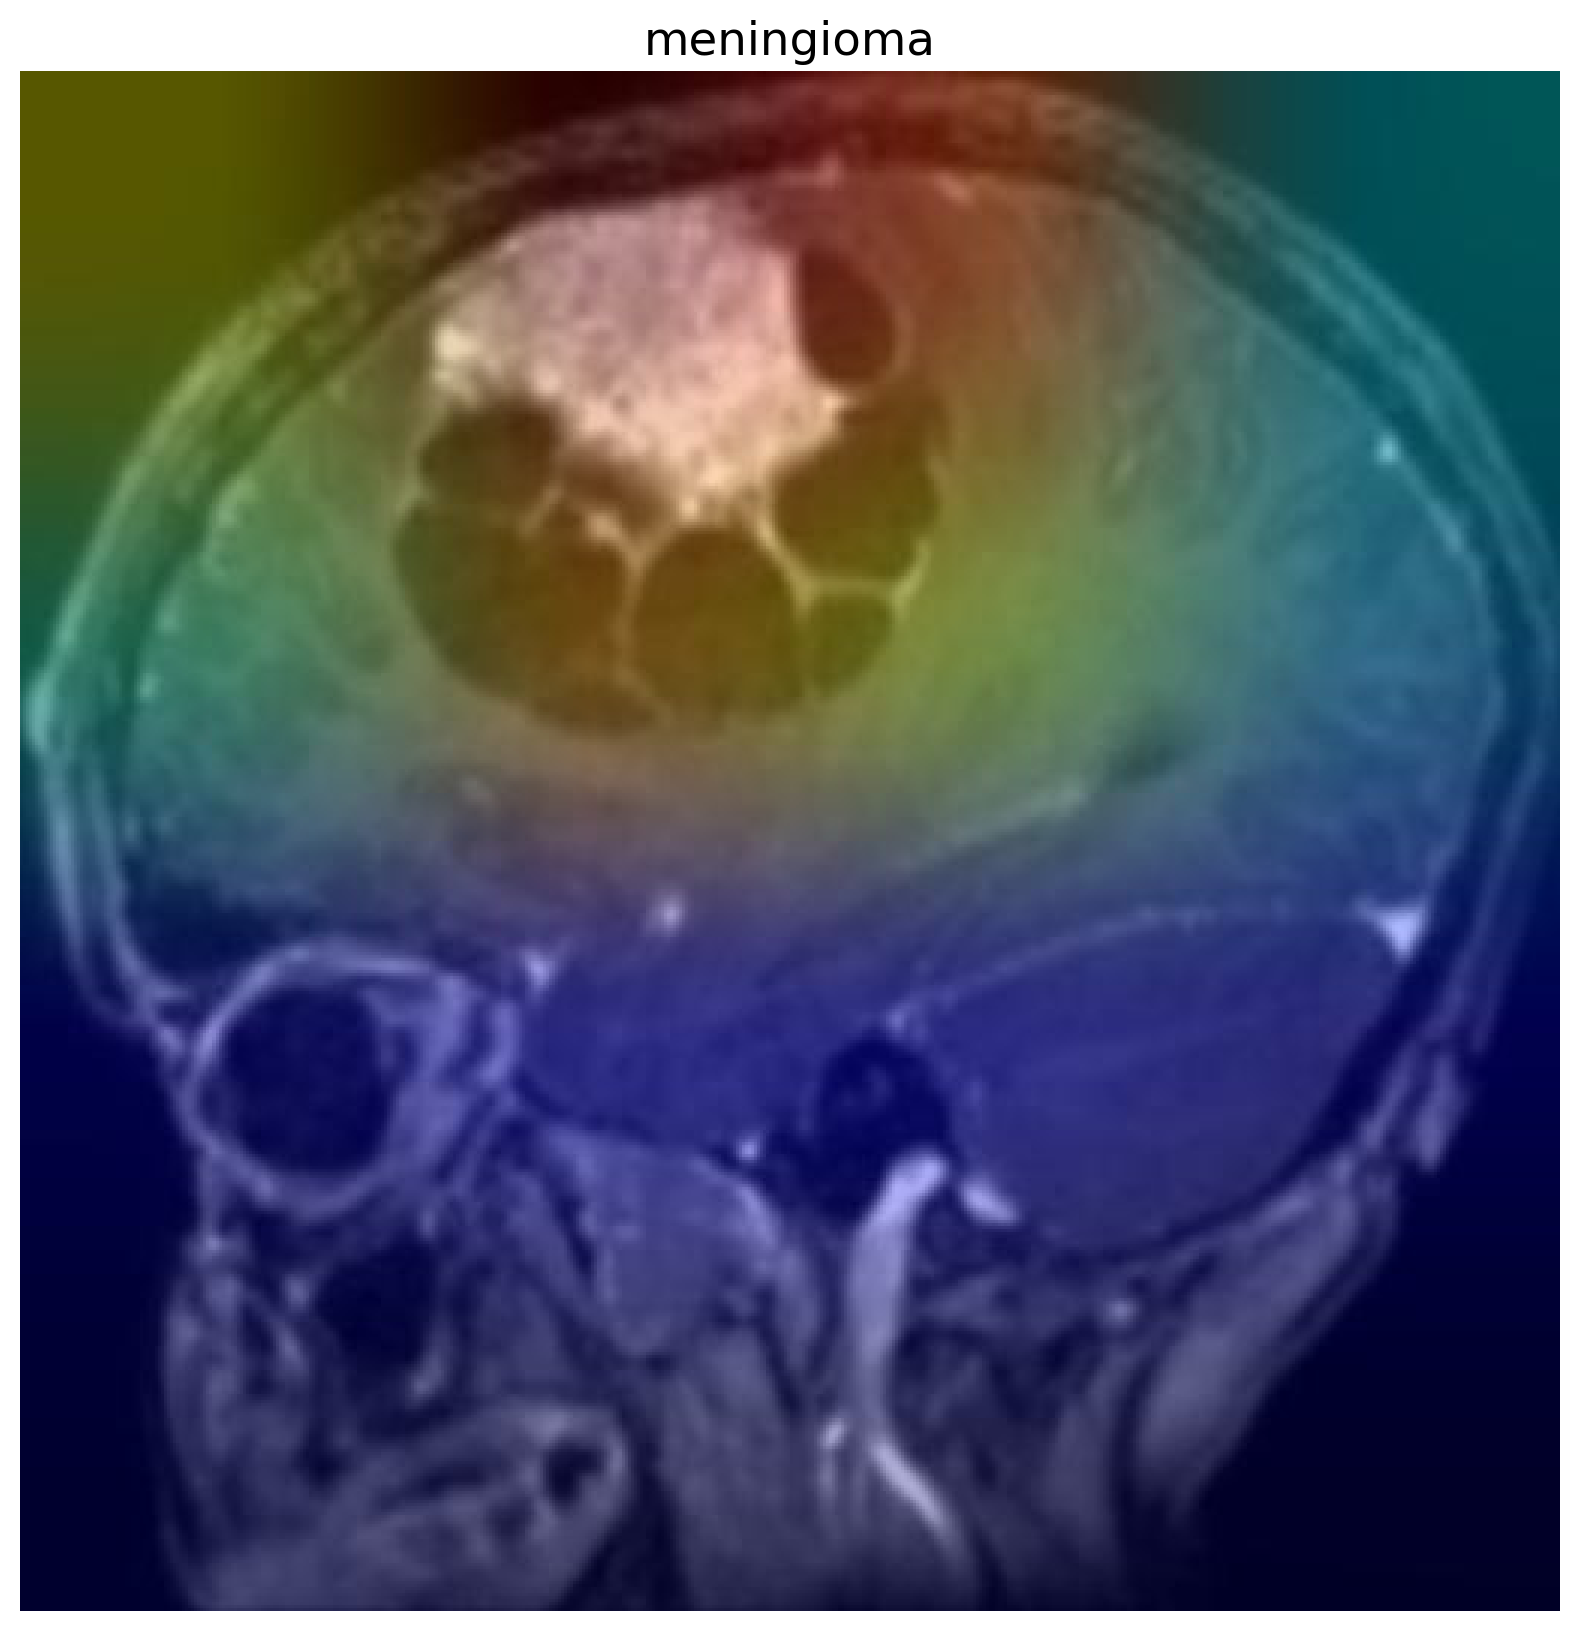

In [185]:
campath, prediction = make_prediction(r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata2\Testing/meningioma/Te-me_0067.jpg', campath="123.jpeg", view=False)
print(prediction)
#"C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\decdata1\Testing\meningioma\Te-me_0015.jpg"
test_img = img.imread(campath)
fig = plt.figure(figsize=(10, 10))
plt.imshow(test_img)
plt.title(prediction)
plt.axis("off")
plt.show()  # Display the plotted image
